### Objetivo do Desafio

Utilizar a base histórica fictícia fornecida para projetar os seguintes indicadores por loja e por mês, no período de julho/2025 a junho/2026:

1. Diárias Locadas
2. Diária Média

### Sobre a Base de Dados

A base fornecida contém registros simulados de contratos de locação com as seguintes colunas:

* id_contrato
* data_inicio_locacao
* duracao_locacao (dias)
* id_loja
* cidade, estado
* dias_antecedencia (entre reserva e início locação)
* categoria_veiculo
* diaria_media
* valor_total_locacao (diaria_media x duração_locacao)

### Etapas Esperadas

Você deve realizar todas as etapas do pipeline de ciência de dados:

1. Análise Exploratória dos Dados: Análise do contexto e das variáveis, identificação de tendências, padrões sazonais e diferenças entre lojas, categorias e preços.

2. Análise Descritiva

3. Modelagem Preditiva:

    * Utilize pelo menos 4 modelos diferentes para previsão dos dois indicadores (ex.: regressão linear, ARIMA/Prophet, Random Forest, XGBoost, LSTM, etc).
    * Avalie os modelos com métricas apropriadas: RMSE, MAE, MAPE.
    * Explique as diferenças entre os modelos e suas vantagens/desvantagens.
    * Use validação apropriada (ex.: backtesting)
    * Pode apresentar graficamente as curvas e intervalos de confiança.

4. Interpretação e Insights: Destaque quais variáveis mais influenciam os resultados. Mostre comparações entre os modelos e recomende qual usar.

### Entrega Esperada

1. Notebook 
Com todas as etapas comentadas: análise, preparação, modelagem e previsão.

2. Apresentação executiva (PDF ou slides)


In [39]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [40]:
# Auxiliaries Functions


def sturges_bins(x):
    x = np.asarray(x)
    x = x[~np.isnan(x)]  # remove NaNs
    n = len(x)
    if n <= 1:
        return 1, np.inf  # caso degenerado

    k = math.ceil(math.log2(n)) + 1
    data_range = x.max() - x.min()
    h = data_range / k if data_range > 0 else np.inf
    return k, h

In [41]:
# Data Reading

df = pd.read_excel("../data/Desafio Inteligência (Cientista de Dados).xlsx")

In [ ]:
# Display Dataframe

display(df.head())
display(df.info())
display(df.describe())

,id_contrato,data_inicio_locacao,duracao_locacao,id_loja,cidade,estado,dias_antecedencia,categoria_veiculo,diaria_media,valor_total_locacao,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,CTR0000001,2022-01-27,8,LJ_01,Recife,DF,13,EconÃ´mico,91.22,729.76,NaN,NaN,NaN,NaN,NaN,NaN
1,CTR0000002,2022-01-31,9,LJ_01,Curitiba,MG,9,IntermediÃ¡rio,78.70,708.30,NaN,NaN,NaN,NaN,NaN,NaN
2,CTR0000003,2022-01-10,7,LJ_01,Rio de Janeiro,MG,16,SUV,143.14,1001.98,NaN,NaN,NaN,NaN,NaN,NaN
3,CTR0000004,2022-01-28,7,LJ_01,Belo Horizonte,RS,4,IntermediÃ¡rio,135.86,951.02,NaN,NaN,NaN,NaN,NaN,NaN
4,CTR0000005,2022-01-28,9,LJ_01,Porto Alegre,PE,9,IntermediÃ¡rio,104.02,936.18,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140249 entries, 0 to 140248
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id_contrato          140249 non-null  object        
 1   data_inicio_locacao  140249 non-null  datetime64[ns]
 2   duracao_locacao      140249 non-null  int64         
 3   id_loja              140249 non-null  object        
 4   cidade               140249 non-null  object        
 5   estado               140249 non-null  object        
 6   dias_antecedencia    140249 non-null  int64         
 7   categoria_veiculo    140249 non-null  object        
 8   diaria_media         140249 non-null  float64       
 9   valor_total_locacao  140249 non-null  float64       
 10  Unnamed: 10          0 non-null       float64       
 11  Unnamed: 11          0 non-null       float64       
 12  Unnamed: 12          0 non-null       float64       
 13  Unnamed: 13   

None

,data_inicio_locacao,duracao_locacao,dias_antecedencia,diaria_media,valor_total_locacao,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 15
count,140249,140249.000000,140249.000000,140249.000000,140249.000000,0.0,0.0,0.0,0.0,10.000000
mean,2023-03-13 18:31:13.553465600,6.347439,15.019287,120.045161,761.950563,NaN,NaN,NaN,NaN,0.100000
min,2022-01-01 00:00:00,1.000000,0.000000,-5.190000,-31.140000,NaN,NaN,NaN,NaN,0.020000
25%,2022-08-01 00:00:00,5.000000,7.000000,99.750000,516.800000,NaN,NaN,NaN,NaN,0.055000
50%,2023-02-24 00:00:00,6.000000,15.000000,120.140000,728.560000,NaN,NaN,NaN,NaN,0.090000
75%,2023-11-03 00:00:00,8.000000,23.000000,140.220000,970.740000,NaN,NaN,NaN,NaN,0.117500
max,2024-06-30 00:00:00,16.000000,30.000000,259.860000,2875.800000,NaN,NaN,NaN,NaN,0.220000
std,NaN,2.271802,8.943597,30.002451,339.808277,NaN,NaN,NaN,NaN,0.066667


In [43]:
# Data Processing

df.categoria_veiculo = df.categoria_veiculo.replace(
    {"IntermediÃ¡rio": "Intermediário", "EconÃ´mico": "Econômico"}
)
df.cidade = df.cidade.replace({"BrasÃ­lia": "Brasília", "SÃ£o Paulo": "São Paulo"})

for column_name in df.columns:
    if "Unnamed" in column_name:
        df.drop(column_name, axis=1, inplace=True)

# Column Names

numerical_columns = [
    "duracao_locacao",
    "dias_antecedencia",
    "diaria_media",
    "valor_total_locacao",
]
categorical_columns = [
    "estado",
    "cidade",
    "id_loja",
    "id_contrato",
    "categoria_veiculo",
]

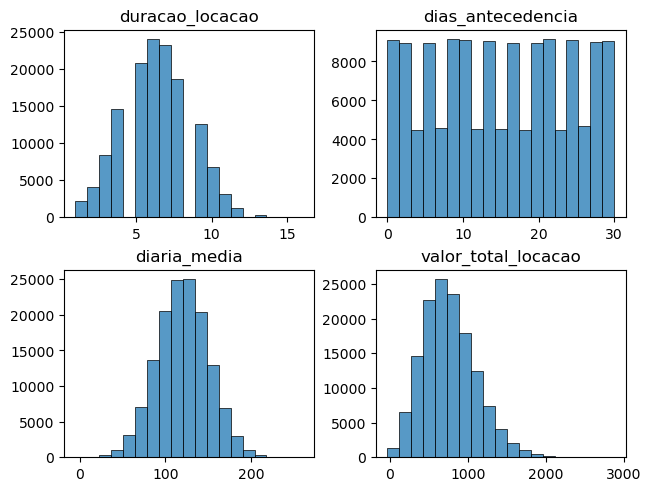

In [44]:
# Plot of Histograms

fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    k, h = sturges_bins(df.loc[:, col].values)
    sns.histplot(data=df, x=col, ax=axes[idx], bins=k, binwidth=h, linewidth=0.5)
    axes[idx].set_title(f"{col}")
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("")

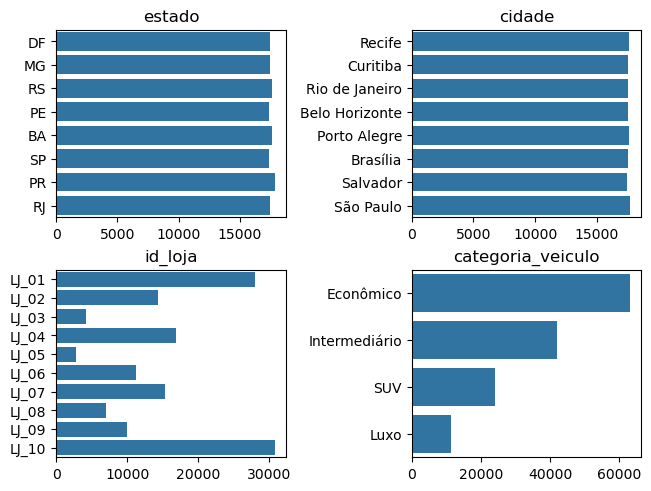

In [45]:
# Plot of Bars

fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
axes = axes.flatten()

idx = 0
for col in categorical_columns:
    if col != "id_contrato":
        sns.countplot(data=df.loc[:, col], ax=axes[idx], linewidth=0.5)
        axes[idx].set_title(f"{col}")
        axes[idx].set_xlabel("")
        axes[idx].set_ylabel("")

        idx += 1


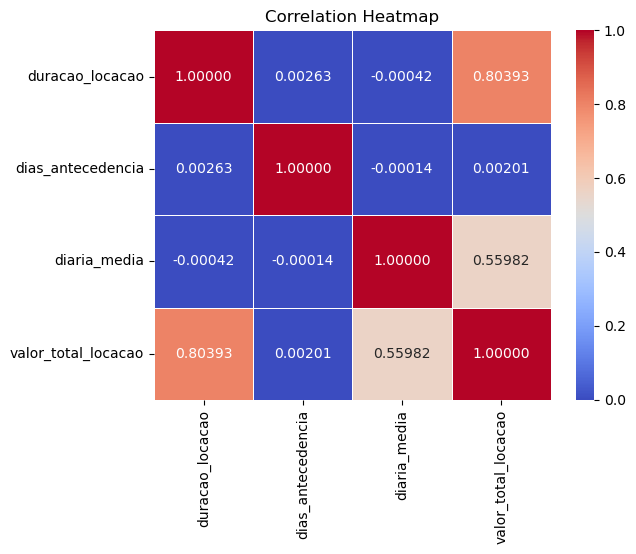

In [46]:
# Plot of Correlations

corr_matrix = df.loc[:, numerical_columns].corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".5f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Text(0, 0.5, 'Frequência')

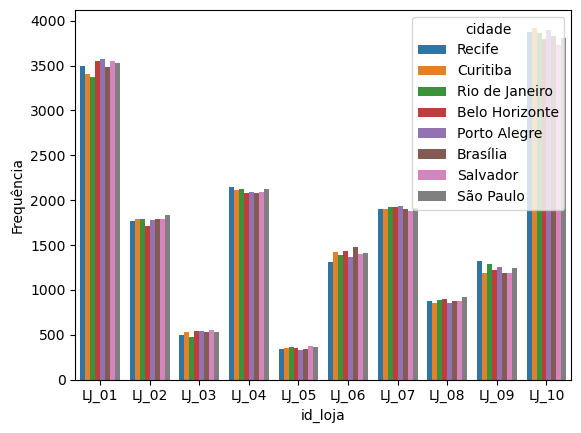

In [48]:
# cidades by id_loja

plt.figure()
sns.countplot(x="id_loja", hue="cidade", data=df, linewidth=0.5)
plt.ylabel("Frequência")

### Variáveis Relevantes

* Dados Categóricos:
    * id_loja
    * id_contrato
    * categoria_veiculo

* Dados Temporais:
    * data_inicio_locacao

* Dados Numéricos
    * duracao_locacao
    * dias_antecedencia
    * diaria_media
    * valor_total_locacao

As variáveis estado e cidade foram desconsideradas, devido a inconsistência dos dados.

In [51]:
# Export Data

df.drop(["cidade", "estado"], axis=1, inplace=True)
display(df.head())
df.to_excel("../data/edited_dataset.xlsx")

,id_contrato,data_inicio_locacao,duracao_locacao,id_loja,dias_antecedencia,categoria_veiculo,diaria_media,valor_total_locacao
0,CTR0000001,2022-01-27,8,LJ_01,13,Econômico,91.22,729.76
1,CTR0000002,2022-01-31,9,LJ_01,9,Intermediário,78.70,708.30
2,CTR0000003,2022-01-10,7,LJ_01,16,SUV,143.14,1001.98
3,CTR0000004,2022-01-28,7,LJ_01,4,Intermediário,135.86,951.02
4,CTR0000005,2022-01-28,9,LJ_01,9,Intermediário,104.02,936.18


In [60]:
import subprocess
import os


def run_streamlit_dashboard(script_path):
    try:
        script_dir = os.path.dirname(script_path)
        script_name = os.path.basename(script_path)

        print(f"Iniciando o dashboard Streamlit em http://localhost:8501")

        command = ["streamlit", "run", script_name]
        process = subprocess.Popen(
            command,
            cwd=script_dir,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True,
        )

        return process

    except FileNotFoundError:
        print(
            "Erro: Streamlit não encontrado. Certifique-se de que está instalado e no PATH."
        )
    except Exception as e:
        print(f"Ocorreu um erro: {e}")


dashboard_path = "../src/dashboard.py"
streamlit_process = run_streamlit_dashboard(dashboard_path)

Iniciando o dashboard Streamlit em http://localhost:8501


In [59]:
streamlit_process.terminate()